In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
sklearn.__version__

'1.0.1'

In [3]:
pd.__version__

'1.1.5'

In [4]:
np.__version__

'1.19.5'

In [53]:
sns.__version__

'0.11.2'

In [7]:
data = pd.read_csv('diabetes_data_upload.csv')

In [8]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [9]:
## Checking the data type of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [10]:
## Finding the number of unique elements in each row
data.nunique(axis=0)

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [11]:
## Checking for Null values.
data.isnull().sum() 

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [12]:
## Transforming yes and no (or true and false) to 1 and 0 respectively
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Polyuria'] = le.fit_transform(data['Polyuria'])
data['Polydipsia'] = le.fit_transform(data['Polydipsia'])
data['sudden weight loss'] = le.fit_transform(data['sudden weight loss'])
data['weakness'] = le.fit_transform(data['weakness'])
data['Polyphagia'] = le.fit_transform(data['Polyphagia'])
data['Genital thrush'] = le.fit_transform(data['Genital thrush'])
data['visual blurring'] = le.fit_transform(data['visual blurring'])
data['Itching'] = le.fit_transform(data['Itching'])
data['Irritability'] = le.fit_transform(data['Irritability'])
data['delayed healing'] = le.fit_transform(data['delayed healing'])
data['partial paresis'] = le.fit_transform(data['partial paresis'])
data['muscle stiffness'] = le.fit_transform(data['muscle stiffness'])
data['Alopecia'] = le.fit_transform(data['Alopecia'])
data['Obesity'] = le.fit_transform(data['Obesity'])

data['class'] = le.fit_transform(data['class'])

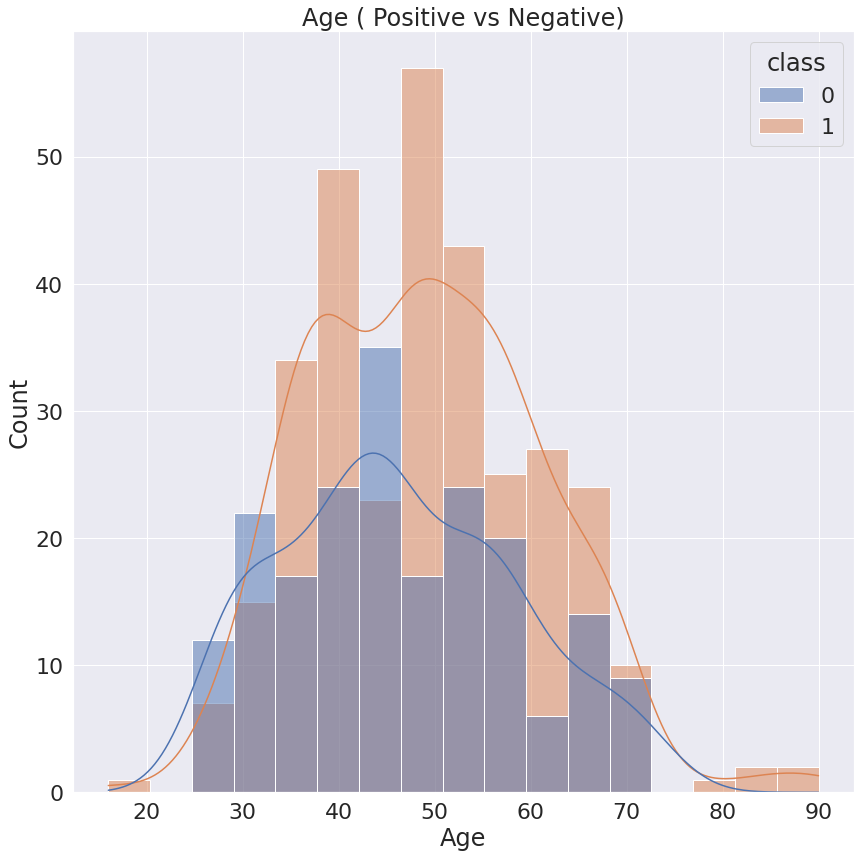

In [52]:
plt.figure(figsize = (14,14))
sns.set(font_scale = 2)
plt.title('Age ( Positive vs Negative)')
sns.histplot(data = data, x = data['Age'],hue = data['class'] ,kde = True)

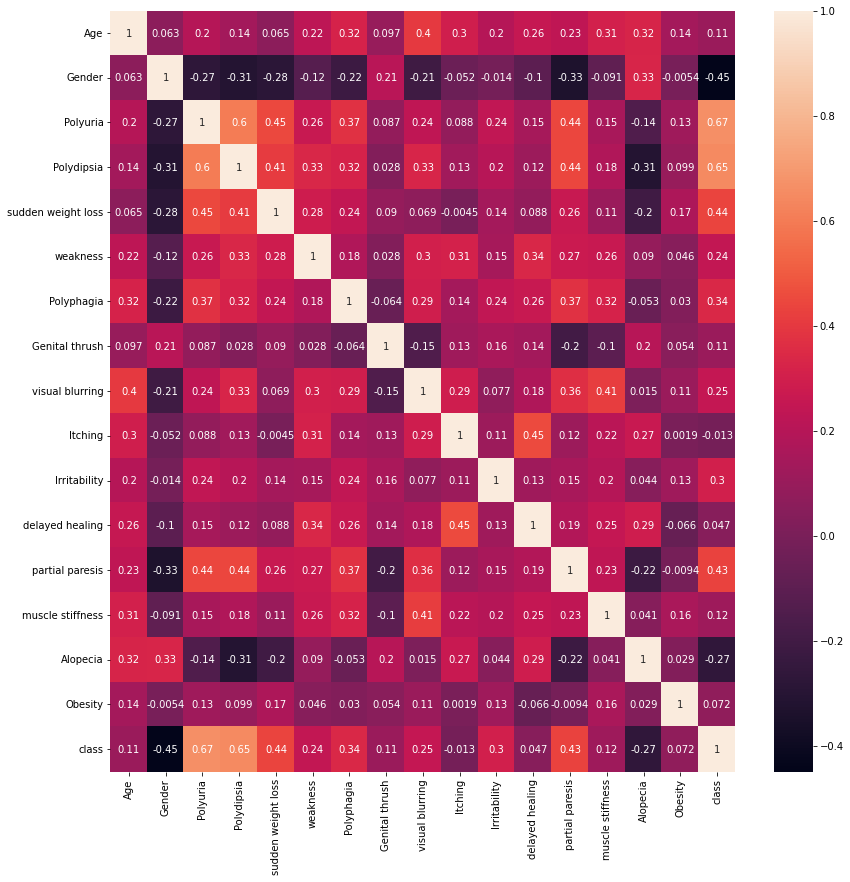

In [47]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True)

In [46]:
(data.corr()['class'].sort_values()[:-1]).round(2)

Gender               -0.45
Alopecia             -0.27
Itching              -0.01
delayed healing       0.05
Obesity               0.07
Age                   0.11
Genital thrush        0.11
muscle stiffness      0.12
weakness              0.24
visual blurring       0.25
Irritability          0.30
Polyphagia            0.34
partial paresis       0.43
sudden weight loss    0.44
Polydipsia            0.65
Polyuria              0.67
Name: class, dtype: float64

**Data Modelling**

In [13]:
data.head() ## Data set is ready the next process 

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [14]:
x = data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia',
          'Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis',
          'muscle stiffness','Alopecia','Obesity']].values
y = data['class'].values

In [15]:
xtrain, xtest, ytrain, ytest  = train_test_split(x, y, train_size = 0.85, random_state = 20)

In [33]:
models= {
    'LogisticRegrsssion ': LogisticRegression(),
    'K-NearstNeighbors  ': KNeighborsClassifier(),
    'Randomforest       ': RandomForestClassifier()
}

In [28]:
final_score = []
for name,model in models.items():
  score = []
  for i in range(100):
    xtrain, xtest, ytrain, ytest  = train_test_split(x, y, random_state = i)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    accuracy = accuracy_score(ypred, ytest)
    score.append(accuracy)
  final_score.append(score)
  print(name+ " : Trained Successfully")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegrsssion  : Trained Successfully
K-NearstNeighbors   : Trained Successfully
    Randomforest    : Trained Successfully


In [34]:
i = len(models)
print("Model\t\t   Accuracy")
for name,model in models.items():
  print(name + str(round(max(final_score[i - 1])*100, 2)))

Model		   Accuracy
LogisticRegrsssion 100.0
K-NearstNeighbors  100.0
Randomforest       100.0
